In [78]:
import scapy.all as sca

In [79]:
pcap_flow = sca.rdpcap("../sample_pcap_files/test01/TRex_to_R11.pcap")
pcap_flow

<TRex_to_R11.pcap: TCP:0 UDP:6991 ICMP:0 Other:16>

In [80]:
p = next( p for p in pcap_flow if p.haslayer(sca.UDP) )
p

<Ether  dst=52:54:00:04:b8:ef src=52:54:00:1b:f0:f0 type=IPv4 |<IP  version=4 ihl=5 tos=0x1 len=31 id=65535 flags=DF frag=0 ttl=64 proto=udp chksum=0x6be5 src=192.168.111.10 dst=192.168.222.140 |<UDP  sport=46924 dport=8001 len=11 chksum=0xe7f8 |<Raw  load='hi\\xab' |<Padding  load='\x0b\x02\x00\\xfe\\xff\\xff\\xff8hM\\xbb\\xcec\x01\x00' |>>>>>

In [81]:
p.command()

"Ether(dst='52:54:00:04:b8:ef', src='52:54:00:1b:f0:f0', type=2048)/IP(version=4, ihl=5, tos=1, len=31, id=65535, flags=2, frag=0, ttl=64, proto=17, chksum=27621, src='192.168.111.10', dst='192.168.222.140')/UDP(sport=46924, dport=8001, len=11, chksum=59384)/Raw(load=b'hi\\xab')/Padding(load=b'\\x0b\\x02\\x00\\xfe\\xff\\xff\\xff8hM\\xbb\\xcec\\x01\\x00')"

In [82]:
float(p.time)

1678201912.4089

In [83]:
p.show()

###[ Ethernet ]### 
  dst       = 52:54:00:04:b8:ef
  src       = 52:54:00:1b:f0:f0
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x1
     len       = 31
     id        = 65535
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = udp
     chksum    = 0x6be5
     src       = 192.168.111.10
     dst       = 192.168.222.140
     \options   \
###[ UDP ]### 
        sport     = 46924
        dport     = 8001
        len       = 11
        chksum    = 0xe7f8
###[ Raw ]### 
           load      = 'hi\\xab'
###[ Padding ]### 
              load      = '\x0b\x02\x00\\xfe\\xff\\xff\\xff8hM\\xbb\\xcec\x01\x00'



In [84]:
p.fields

{'dst': '52:54:00:04:b8:ef', 'src': '52:54:00:1b:f0:f0', 'type': 2048}

In [85]:
p.direction

In [86]:
p.layers()

[scapy.layers.l2.Ether,
 scapy.layers.inet.IP,
 scapy.layers.inet.UDP,
 scapy.packet.Raw,
 scapy.packet.Padding]

In [87]:
p.payload

<IP  version=4 ihl=5 tos=0x1 len=31 id=65535 flags=DF frag=0 ttl=64 proto=udp chksum=0x6be5 src=192.168.111.10 dst=192.168.222.140 |<UDP  sport=46924 dport=8001 len=11 chksum=0xe7f8 |<Raw  load='hi\\xab' |<Padding  load='\x0b\x02\x00\\xfe\\xff\\xff\\xff8hM\\xbb\\xcec\x01\x00' |>>>>

In [88]:
bool(p.haslayer(sca.IP))

True

In [89]:
bool(p.haslayer(sca.UDP))

True

In [90]:
bool(p.haslayer(sca.ICMP))

False

In [91]:
bool(p.haslayer(sca.Padding))

True

In [92]:
p.getlayer(sca.UDP).payload.remove_payload()
p

<Ether  dst=52:54:00:04:b8:ef src=52:54:00:1b:f0:f0 type=IPv4 |<IP  version=4 ihl=5 tos=0x1 len=31 id=65535 flags=DF frag=0 ttl=64 proto=udp chksum=0x6be5 src=192.168.111.10 dst=192.168.222.140 |<UDP  sport=46924 dport=8001 len=11 chksum=0xe7f8 |<Raw  load='hi\\xab' |>>>>

In [93]:
p.getlayer(sca.UDP).payload.remove_payload()
p.getlayer(sca.UDP)

<UDP  sport=46924 dport=8001 len=11 chksum=0xe7f8 |<Raw  load='hi\\xab' |>>

In [94]:
len(p.getlayer(sca.UDP))

11

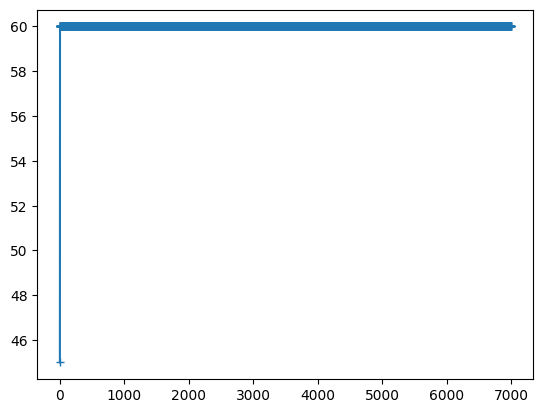

In [95]:
pcap_flow.plot(lambda x:len(x), lfilter=lambda x: x.haslayer(sca.UDP))